In [ ]:
# 多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'

# Overview
## The challenge
There weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.  

In this challenge, we ask you to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

## Submission File Format:
You should submit a csv file with exactly 418 entries plus a header row. 

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)


# Load the data

## 导入数据并显示

In [114]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('//Volumes//windows//pythonstudy//titanic/train.csv')
test_data = pd.read_csv('//Volumes//windows//pythonstudy//titanic/test.csv')
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 其他

### 查看路径下的文件夹

In [115]:
import os
for dirname, _, filenames in os.walk('//Volumes//windows//pythonstudy//titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

//Volumes//windows//pythonstudy//titanic/gender_submission.csv
//Volumes//windows//pythonstudy//titanic/test.csv
//Volumes//windows//pythonstudy//titanic/train.csv


### 获取当前路径 

In [116]:
os.getcwd()

'/Volumes/windows/pythonstudy/BestProj/Jupyter-Notebook'

# Explore a pattern

## Show the survive rate of female

In [117]:
# Show the survive rate of female
women = train_data.loc[train_data.Sex == 'female']['Survived']  # df.loc[val] selet a line or lines by index
rate_women = women.sum()/len(women)
rate_women

0.7420382165605095

In [118]:
# Show the survive rate of male
men = train_data.loc[train_data.Sex == 'male']['Survived']  # df.loc[val] selet a line or lines by index
rate_men = men.sum()/len(men)
rate_men

0.18890814558058924

In [119]:
# survive rate figured at every pclass
per_pclass_rate = []
for i in range(1,4):
    per_pclass = train_data.loc[train_data.Pclass == i]['Survived']  # df.loc[val] selet a line or lines by index
    per_pclass_rate_i = per_pclass.sum()/len(per_pclass)
    per_pclass_rate.append(per_pclass_rate_i)
per_pclass_rate

[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]

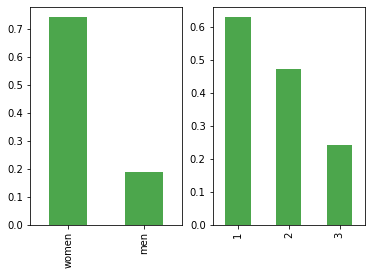

In [120]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)

data = pd.Series([rate_women, rate_men], index=['women','men'])
data.plot.bar(ax=axes[0],color='g',alpha=0.7)

data = pd.Series(per_pclass_rate, index=[1,2,3])
data.plot.bar(ax=axes[1],color='g',alpha=0.7)



# Data processing

## Onehot coding convert categorical to dummy

In [145]:
# Pclass Sex SibSp Parch
y = train_data['Survived']
feature = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = train_data[feature]  # one argument, which is a list
X_test = test_data[feature]
X
X_test

,Pclass,Sex,SibSp,Parch
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0
...,...,...,...,...
886,2,male,0,0
887,1,female,0,0
888,3,female,1,2
889,1,male,0,0


,Pclass,Sex,SibSp,Parch
0,3,male,0,0
1,3,female,1,0
2,2,male,0,0
3,3,male,0,0
4,3,female,1,1
...,...,...,...,...
413,3,male,0,0
414,1,female,0,0
415,3,male,0,0
416,3,male,0,0


In [146]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)
X
X_test

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
...,...,...,...,...,...
886,2,0,0,0,1
887,1,0,0,1,0
888,3,1,2,1,0
889,1,0,0,0,1


,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,0,0,0,1
1,3,1,0,1,0
2,2,0,0,0,1
3,3,0,0,0,1
4,3,1,1,1,0
...,...,...,...,...,...
413,3,0,0,0,1
414,1,0,0,1,0
415,3,0,0,0,1
416,3,0,0,0,1


### get_dummies
Convert categorical variable into dummy/indicator variables.

In [147]:
pd.get_dummies??

# Module selection

In [155]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)

/Users/king/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Output

In [157]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./results/Titanic.csv', index=False)
print('My submission was successfully saved.')

My submission was successfully saved.
